In [1]:
using Plots

In [4]:
pyplot()

Plots.PyPlotBackend()

In [2]:
theme(:lime)

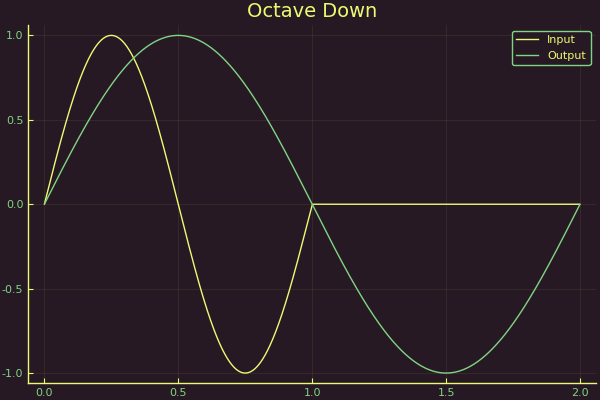

In [5]:
# Octave Down, Hack Audio Example

# This example is similar to the one in Hack Audio Ch. 15
# Note that the delay isn't really a delay relative to the
# input, it's just a playback index through the buffer.
# Using this same approach for the octave up example,
# without using a read index for the array, doesn't
# produce the desired result.

# Create a sample signal. 

sr = 48000
Ts = 1/sr
t = 0:Ts:1
f = 1
sig = sin.(2pi*f*t)

# Pad the signal with zeros, since the octave-down 
# signal will be twice as long.
pad = zeros(sr)
input = [sig;pad]
x = 0:Ts:2

plot(x, input, label="Input", title="Octave Down")

d = 1
N = length(input)
y = zeros(N)
buffer = zeros(N)

for i in 1:N-1
    intDelay = floor(Int, d)
    buffer[i] = input[i]
    
    if intDelay === 0
        y[i] = input[i]
    else
        frac = d - intDelay
        buffer[i] = input[i]
        y[i] = (1-frac) * buffer[intDelay] + frac * buffer[intDelay+1]
    end
    
    # The "delay" steps through the buffer at a half the speed the buffer is filled
    d += 0.5
end

plot!(x, y, label="Output")

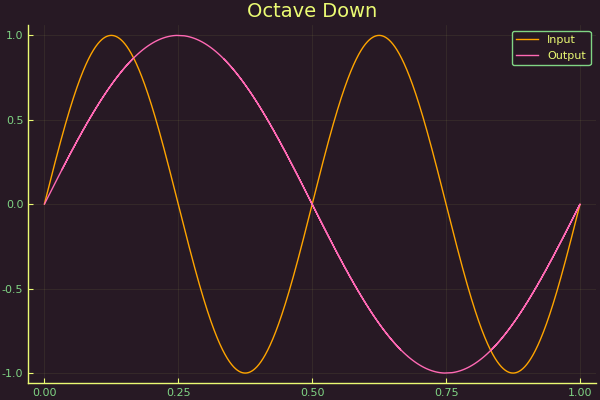

In [35]:
sr = 48000
Ts = 1/sr
t = 0:Ts:1
f = 2
input = sin.(2*pi*f*t)

plot(t, input, label="Input", color=:orange, title="Octave Down")

d = 1
N = length(input)
y = zeros(N)
buffer = zeros(N)

for i in 1:N-1
    intDelay = floor(Int, d)
    readIndex = i - intDelay + 1
    buffer[i] = input[i]
    
    if intDelay === 0
        y[i] = input[i]
    else
        frac = d - intDelay
        buffer[i] = input[i]
        y[i] = (1-frac) * buffer[readIndex] + frac * buffer[readIndex+1]
    end
    
    # The delay time is constantly increasing. This is equivalent to modulating
    # the delay time by a ramp-up sawtooth wave, whose frequency is 0.5Hz
    d += 0.5
end

plot!(t, y, label="Output", color=:hotpink)

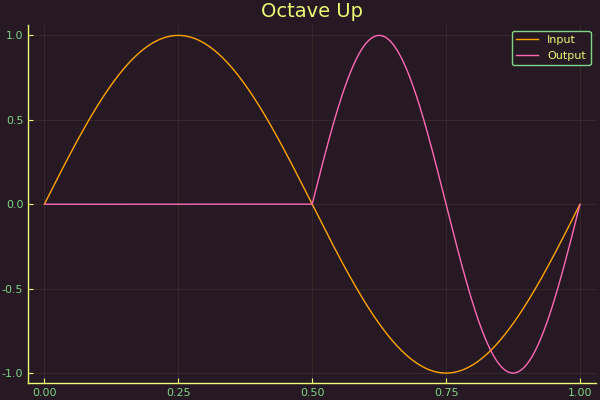

In [36]:
# Octave Up

sr = 48000
Ts = 1/sr
t = 0:Ts:1
f = 1

input = sin.(2*pi*f*t)

# This time the input signal will be longer than the output
# so there's no need to pad it

plot(t, input, label="Input", color=:orange, title="Octave Up")

d = sr
N = length(input)
y = zeros(N)
buffer = zeros(N)

for i in 1:N-1
    intDelay = floor(Int, d)
    readIndex = i - intDelay
    buffer[i] = input[i]
    
    if i - intDelay > 0
        # In this unique example, the fractional part of the delay index 
        # will always be zero, but that won't be true for any interval whose
        # frequency is not an integer multiple of the fundamental
        frac = d - intDelay
        y[i] = (1-frac) * buffer[readIndex] + frac * buffer[readIndex+1]
    else
        y[i] = 0
    end
    
    # The delay time is constantly decreasing. This is equivalent to modulating
    # the delay time by a ramp-down sawtooth wave, whose frequency is 1Hz
    d -= 1
end

plot!(t, y, label="Output", color=:hotpink)

# [input y dtimes]


In [1]:
# Controlling pitch shift amount

sr = 48000
Ts = 1/sr
t = 0:Ts:1
f = 1

input = sin.(2*pi*f*t)

semitones = 3

3

In [34]:
# The relationship between delta (in samples) delay time each sample
# and the number of semitones you want to change the pitch is 
# 1 - (2^(x/12)) where x = semitones

deltarate = x -> 1 - (2^(x/12))

# To convert from delta_delay to semitones, the opposite formula is
# 12 * log2(1 - d) where d = delta delay time

semitoneshift = d -> 12 * log2(1-d)

semitones = -3.0

delta = deltarate(semitones)
semis = semitoneshift(delta)

-3.000000000000001

It's easier to understand this relationship using $\Delta pitch$ in octaves, to get rid of those 12s.

$d = 1 - 2^x$

$x = \log_2(1-d)$

With semitones, we multiply $\log_2(1-d)$ by 12, because every octave buys us 12 semitones.

$d = \Delta playback rate$

$x = \Delta semitones$

$d = 1 - 2^{\frac{x}{12}}$

$x = 12 \times \log_2(1-d)$

Let's isolate x from the first equation to show the relationship between these two equations:

$d = 1 - 2^{\frac{x}{12}}$

$d - 1 = -2^{\frac{x}{12}}$

$1 - d = 2^{\frac{x}{12}}$

$(1 - d)^{12} = 2^x$

$x = \log_2((1-d)^{12})$

$x = 12 \times \log_2(1-d)$ (using the [Power Property of Logarithms](http://statisticslectures.com/topics/powerproplogarithms/))